In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datasets import load_dataset
import ast
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text


c:\Users\anmol\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = pd.read_pickle('datasets\ds_cleaned_2')

In [3]:
count_per_salary = ds.groupby('job_title_short').agg(
    jobs_posting = ('job_title_short' , 'count'),
    avg_salary = ('salary_year_avg','median')
)

In [4]:
count_per_salary.reset_index(inplace=True)

In [5]:
count_per_salary

,job_title_short,jobs_posting,avg_salary
0,Business Analyst,49053,85000.0
1,Cloud Engineer,12331,90000.0
2,Data Analyst,196050,90000.0
3,Data Engineer,186216,125000.0
4,Data Scientist,172263,127500.0
5,Machine Learning Engineer,14079,106415.0
6,Senior Data Analyst,29214,111175.0
7,Senior Data Engineer,44561,147500.0
8,Senior Data Scientist,36955,155500.0
9,Software Engineer,44918,99150.0


In [6]:
total_jobs = count_per_salary['jobs_posting'].sum()

In [7]:
count_per_salary['jobs_posting']= count_per_salary['jobs_posting'] * 100 /total_jobs

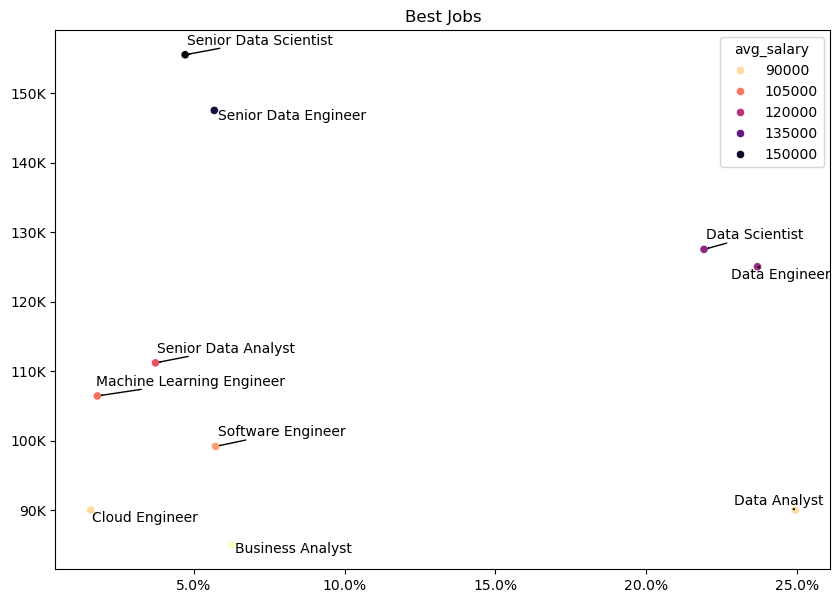

In [8]:
plt.figure(figsize=(10,7))
plt.title('Best Jobs')
sns.scatterplot(count_per_salary , x='jobs_posting' , y='avg_salary', hue='avg_salary' , palette='magma_r' )

texts=[]
for i , text in enumerate(count_per_salary['job_title_short']):
    texts.append(plt.text(count_per_salary['jobs_posting'][i] , count_per_salary['avg_salary'][i] , text ))

adjust_text(texts , arrowprops=dict(arrowstyle="->" , color='black' , lw=1))
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{x}%'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y , pos:f'{int(y/1000)}K'))
